<a href="https://colab.research.google.com/github/AnaGutson/AlgebraII/blob/main/Guia_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 4**

In [2]:
from sympy import *
from sympy import I as i
init_printing(use_unicode=True)
from typing import List, Dict
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from math import e as e

## **General**

###**Triángulo de Pascal**

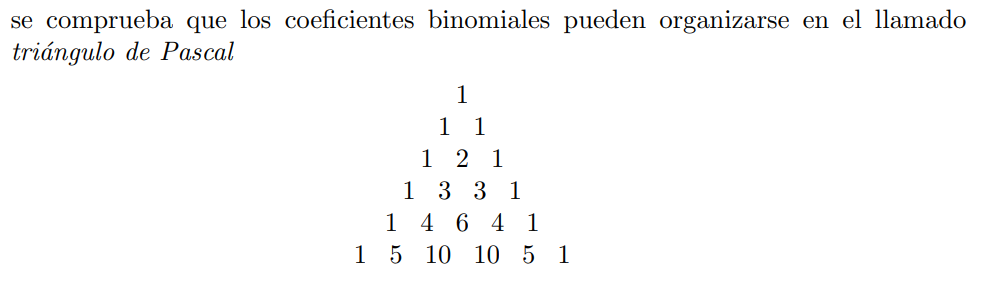

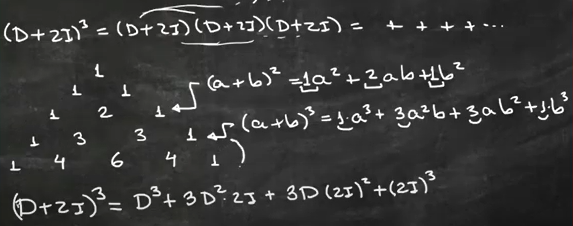

### **Producto Vectorial**

In [3]:
def producto_vectorial(A,B):
  a = Matrix([[A[1], A[2]], [B[1], B[2]]]).det()
  b = Matrix([[A[0], A[2]], [B[0], B[2]]]).det()
  c = Matrix([[A[0], A[1]], [B[0], B[1]]]).det()
  return Matrix([a, -b, c])

###**Traza**

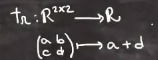

### **Matrices**

In [4]:
'''
  A.inv                                   -> La inversa de A
  A.T                                     -> La transpuesta de A
  A.transpose()                           -> La transpuesta de A
  A.det                                   -> Determinante de A
  A.trace()                               -> Traza de A
  A.normalized()                          -> Matriz normalizada
  A.rref()                                -> Matriz triangulada
  A[1,0]                                  -> Posicion segunda fila primera columna
  A[:,0]                                  -> La primera columna de A
  A[0,:]                                  -> La primera fila de A
  A.col(0)                                -> La primera columna de A
  A.subs(t, pi/3)                         -> Reemplaza las t por pi/3
  A.subs({x1:1, x2:5, x3:7})              -> Reemplaza x1 por 1, x2 por 5...
  Z = zeros(2,1)                          -> Matriz de 0s de 2 filas 1 columna
  unos = ones(2,1)                        -> Matriz de 1s de 2 filas 1 columna
  eye(n)                                  -> Matriz identidad en n x n
  Matrix.hstack(v1,v2)                    -> Matriz con columnas v1, v2
  Matrix.vstack(v1,v2)                    -> Matriz con filas v1, v2
  Lambda = diag(2, 2, 3)                  -> Matriz diagonal
  x, parametro = B.gauss_jordan_solve(v)  -> Solucion de B.x = v
  simplify(A)                             -> Simplifica A
  expand(A)                               -> Expande A
  n, m = A.shape                          -> Cantidad filas y columnas de A
'''


#Escritura de matriz, ejemplos:

U = Rational('1/3') * Matrix([[ 2, 2, 1],
                              [-2, 1, 2],
                              [ 1,-2, 2]])

#___________________________________________

t = Symbol('t')
A = Matrix([[ cos(t), -sin(t)],
            [ sin(t), cos(t)]])
A.subs(t, pi/3)


def matriz_con_elementos_potenciados(A, pot):
  m, n = A.shape
  M = Matrix()
  for i in range(m):
    M_a_agregar = Matrix([A[i,0]**pot]) 
    M = M.vstack(M, M_a_agregar)
  return M

def rango(A):
  return len(A.columnspace())


### **Polinomios**

In [5]:
'''
  diff(p,x) -> La derivada de p respecto de x
  p.subs(x,1) -> p(1)
  p.factor() -> factoriza un polinomio
  p.roots() -> las raices del polinomio
  solve(p) -> las raices del polinomio
  P = plot(p,(x,0,2)) -> grafico del polinomio con x entre 0 y 2
  P = plot(*L, (x,0,2)) -> grafico de una lista de polinomios con x entre 0 y 2
  P[0].line_color = 'red' -> color del primer polimonio
  P.show() -> muestra el grafico del polinomio con x entre 0 y 10
'''

#Escritura de polimomio, ejemplos:

x, a0, a1, a2 = symbols('x, a0, a1, a2')
p = a0 + a1*x + a2*x**2

### **Combinación Lineal**

In [6]:
def gauss_jordan_con_generadores(A: Matrix, z: Matrix): #devuelve la solucion de gauss jordan entera, la sol part y sus generadores
  x, p = A.gauss_jordan_solve(z) 
  
  #hallo sol particular
  x_0 = x
  for i in range(len(p)):  
    x_0 = x_0.subs({p[i]:0}) 
  
  #hallo generadores
  generadores = []
  for i in range(len(p)):
    x_i = x - x_0
    for j in range(len(p)):
      if j != i:
        x_i = x_i.subs({p[j]:0})
    x_i = x_i.subs({p[i]:1})
    generadores.append(x_i)
    
  return x, x_0, generadores

### **Independencia Lineal**

In [7]:
def encontrar_vector_li_a_conjunto(A: List[Matrix]):  #Principio de sustitución de Steinez
  cant_filas, _ = A[0].shape
  A_ld = Matrix.hstack(*A, eye(cant_filas,cant_filas))
  A_li = obtener_vectores_li(A_ld)
  return A_li

#_______________________

def obtener_vectores_li(A: Matrix):
  E_A, pivotes_A = A.rref()
  A_li = []
  for pivote in pivotes_A:
      A_li.append(A.col(pivote))        #De la matriz original
  return A_li

#_______________________

'''
  Ejemplo:
  B = [Matrix([a, 1, 2]), Matrix([3, 2, 3]), Matrix([1, -a, 1])] #una lista
  encontrar_a(B, a)
'''
a = Symbol('a')
def encontrar_a(B: List[Matrix], a: Symbol): #Halla el o los valores que puede tener a para que los vectores sean linealmente independientes: formen una base

    return solve(det(Matrix.hstack(*B)), a)

### **Ínfimo y Supremo**

In [8]:
'''
cant_neg: cantidad de vectores que pertenecen al segundo subespacio
'''
def interseccion_S1_S2_dos_lados(S1: List[Matrix], S2: List[Matrix]):
  S2_neg = [i*(-1) for i in S2]
  B_S1_S2 = Matrix.hstack(*S1,*S2_neg)
  cant_S2 = len(S2)
  nul_B_S1_S2 = B_S1_S2.nullspace()
  S1_int_S2 = []
  for v in nul_B_S1_S2:
      v[(-1)*cant_S2:,:] = zeros(cant_S2, 1)
      S1_int_S2.append(B_S1_S2 * v)

  return S1_int_S2

def union_S1_S2(S1: List[Matrix], S2: List[Matrix]):
    B_S1_S2 = Matrix.hstack(*S1,*S2)
    S1_un_S2 = obtener_vectores_li(B_S1_S2)
    return S1_un_S2                

###**Transformaciones Lineales**

In [9]:
#Parametros: T una t.l, B una base    
#Devuelve la matriz de la transformacion lineal T a partir de T y una base
def matriz_tl_con_tl_y_base(T: Matrix, B: List[Matrix]): #la matriz de T a partir de B
  TB = Matrix() 
  for i in B:
    ti = T*i
    TB = Matrix.hstack(TB, ti)
  return TB


#Parametros: B una base, W  los transformados de B    
#Devuelve la matriz de la transformacion lineal T a partir de una base, y los transformados de la base    
def matriz_tl_con_base_y_transformados(B: List[Matrix], W: List[Matrix]): #la matriz de T a partir de los transformados de B
    return Matrix.hstack(*W) * Matrix.hstack(*B).inv()

#Parametros: T una t.l, p una lista de polinomios
#Devuelve T(polinomios)
def transformacion_lineal_pol(T: Matrix, polinomios):
  polinomios = [Matrix([i]) for i in polinomios]
  P = Matrix.vstack(*polinomios)
  return (expand(T*P))[0,0] #devuelvo el elemento que está en formato Matriz

### **Monomorfismo, epimorfismo e isomorfismo**

In [10]:
def clasificacion(At: Matrix):
  imT = At.columnspace()
  nuT = At.nullspace()

  dimW, dimV = At.shape
  if len(nuT) == 0 and len(imT) == dimW:
    return 'T es un isomorfismo'
  else:
    if len(nuT) == 0:
      return 'T es un monomorfismo'
    elif len(imT) == dimW:
      return 'T es un epimorfismo'
  
  return 'T no es un monomorfismo ni un epimorfismo'

### **Imagen y Preimagen**

In [11]:
'''
    Halla la imagen por T de un subespacio S dada una base B y la imagen por T de B
    
    B: es una lista de vectores que conforman la base B
    W: es una lista de vectores que corresponden a las imágenes de los vectores de la base B
    S: es una lista de vectores que generan el subespacio S
'''
def imagen_por_T_de_S_con_B_y_W(B: List[Matrix], W: List[Matrix], S: List[Matrix]): 
    # Obtengo la matriz de T
    A_T = matriz_tl_con_base_y_transformados(B, W)

    # Obtengo los transformados de S    
    imagen_T_S = A_T * Matrix.hstack(*S)

    # Armo una base con los transformados de S    
    base_T_S = obtener_vectores_li(imagen_T_S)
    
    return base_T_S

#_______________________________________________________________________________


#Forma 1, explicada arriba
def preimagen_subespacio_con_At(At: Matrix, Au: Matrix):
  
    return (Au*At).nullspace()
    
#_______________________________________________________________________________

#Forma 2, explicada arriba
def preimagen_subespacio_con_B_y_W(B: List[Matrix], W: List[Matrix], Au: Matrix):
    B_matrix = Matrix.hstack(*B)
    W_matrix = Matrix.hstack(*W)

    sol = (Au * W_matrix).nullspace()
    preimagen_U = B_matrix * Matrix.hstack(*sol)

    #Obtengo una base de la preimagen
    B_T_inv_U = obtener_vectores_li(preimagen_U)
    
    return B_T_inv_U    


### **Coordenadas**

In [12]:
def coordenadas_v_en_B(v: Matrix, B):
  M_B = Matrix.hstack(*B) 
  
  #v = M_B * [v]^B
  vB, pivotes = M_B.gauss_jordan_solve(v)
  
  return vB

def imagen_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, Bprima: List[Matrix]):
  
  #Obtengo Col(At) = gen{[T(v)]^B' ... }
  imagenBprima = At_B_Bprima.columnspace()

  #Quiero Im(T) = gen{T(v) ... }
  #Es decir, necesito escribir los [T(v)]^B' como T(v)
  #T(v) = M_Bprima * [T(v)]^B'
  imagen = Matrix.hstack(*Bprima) * Matrix.hstack(*imagenBprima)
  
  base_imagen = obtener_vectores_li(imagen)
  
  return base_imagen

def nucleo_de_T_con_At_B_Bprima(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoB = At_B_Bprima.nullspace()

  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B
  nucleo = Matrix.hstack(*B) * Matrix.hstack(*nucleoB)
  
  base_nucleo = obtener_vectores_li(nucleo)
  
  return base_nucleo

def nucleo_de_T_con_At_B_Bprima_pol(At_B_Bprima: Matrix, B: List[Matrix]):
  
  #Obtengo Nul(At) = gen{[x]^B ... }
  nucleoT = T1oT2inv_Eprima_E.nullspace()
  
  #Quiero Nu(T) = gen{x ... }
  #Es decir, necesito escribir los [x]^B como x
  #x = M_B * [x]^B

  nucleo = Ep * Matrix.hstack(*nucleoT)
  
  return nucleo 

### Graficar

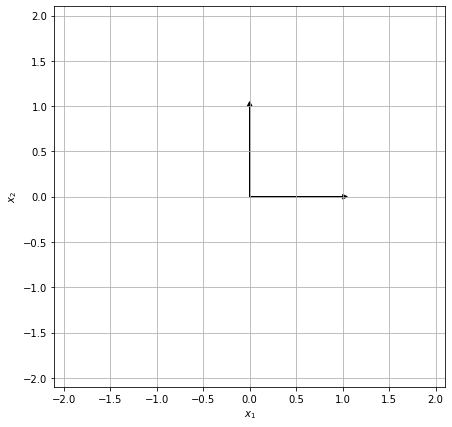

In [13]:
def plot_vector2d(*vectors,xlim=(0,1),ylim=(0,1)):
  fig, ax = plt.subplots(1,1,figsize=(7,7))

  for v in vectors:
    x, y = float(v[0]), float(v[1])
    ax.arrow(0,0,x,y,head_width=0.05, head_length=0.05, fc='k', ec='k')
  
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)
  ax.grid(True)
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  fig.show()
  return fig, ax

def plot_recta_simetria(theta,ax):
  x1, x2 = ax.get_xlim()

  if theta not in [pi/2,-pi/2]:
    y1 = float(tan(theta/2*x1))
    y2 = float(tan(theta/2*x2))
  else:
    y1, y2 = ax.get_ylim()
  
  ax.arrow(x1,y1,x2-x1,y2-y1,fc='b',ec='b')
  return ax

def graficar_dos_funciones(f1,f2):
  p1 = plot(f1,xlim=(-1,1),ylim=(-2,2),show=False,line_color='blue')
  p2 = plot(f2,xlim=(-1,1),ylim=(-2,2),show=False,line_color='red')
  p1.append(p2[0])
  p1.show()

v1, v2 = Matrix([1,0]), Matrix([0,1])
fig, ax = plot_vector2d(v1,v2,xlim=(-2.1,2.1),ylim=(-2.1,2.1))

### **Proyecciones y Simetrías**

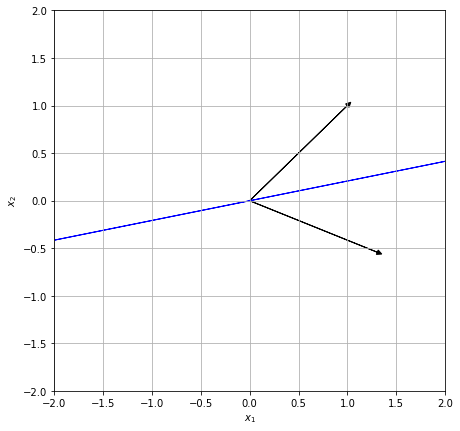

In [14]:
def simetria(v,theta):
  S = Matrix([[cos(theta), sin(theta)],
              [sin(theta), -cos(theta)]])
  w = S * v
  return w

v = Matrix([1,1])
theta = pi/8

v_s = simetria(v,theta)
fig, ax = plot_vector2d(v,v_s,xlim=(-2,2),ylim=(-2,2))
ax = plot_recta_simetria(theta,ax)

#__________________________

def tipo_tl(T: Matrix):
  T2 = T*T
  n,m = T2.shape
  if T2 == T:
    return 'Es una proyección'
  elif T2 == eye(n,n):
    return 'Es una simetría'
  return 'No es proyección ni simetría'
  


### **Rotaciones**

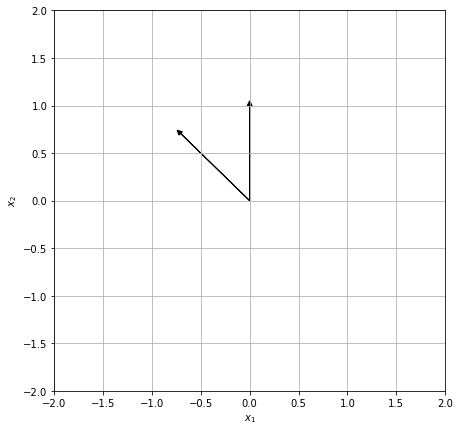

In [15]:
def rotacion(v,theta):
  R = Matrix([[cos(theta), -sin(theta)],
              [sin(theta), cos(theta)]])
  w = R * v
  return w

#Ejemplo
v = Matrix([0,1])
theta = pi/4

v_r = rotacion(v,theta)
fig, ax = plot_vector2d(v,v_r,xlim=(-2,2),ylim=(-2,2))

### **Ecuaciones Diferenciales**

In [16]:
def nucleo_de_operador_diferencial(L):
    x = Symbol('x')
    Nu_L = set()
    raices = str(L).split('*')
    l = 1
    for raiz in raices:

      if '-' in raiz:
        index = raiz.index('-') + 1
        l = (int(raiz[index]))*(-1)
      elif '+' in raiz:
        index = raiz.index('+') + 1
        l = (int(raiz[index]))
      else:
        display(raiz)
      
      if '^' in raiz:
        k = int(raiz.split('^')[1])
      else:
        k = 1
          
      for i in range(k):
        Nu_L.add((x**(i))*exp(-l*x))

    return Nu_L

def gen_solucion_particular(L, AoL):
    Nu_L = nucleo_de_operador_diferencial(L)
    Nu_AoL = nucleo_de_operador_diferencial(AoL)
    Nu = set()
    Nu = Nu_L | Nu_AoL
    Nu = Nu - Nu_L
    return list(Nu)

D, I = symbols('D I')
L = '(D-5I)*(D+2I)^2'
AoL = '(D-5I)*(D+2I)^5'
gen_solucion_particular(L, AoL)

###**Producto Interno**

In [17]:
def producto_interno_canonico(x, y, G: Matrix = None):
    return (y.T * x)[0]

def producto_interno_por_definicion(x: Matrix, y: Matrix, G: Matrix):
    return (y.T * G * x)[0]
    
def producto_interno_polinomios_integral(p, q, G:Matrix = None, limite_inferior=-1, limite_superior=1, a=1):
    return integrate(p * q * a, (x, limite_inferior, limite_superior))

def norma(x, producto_interno, G: Matrix=None):
    return sqrt(producto_interno(x, x, G))

#A.norm() -> la norma con el producto interno canónico, es decir, producto escalar

###**Matriz de Gram**

In [18]:
def matriz_gram(producto_interno, B):
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q)
    return G 

def matriz_gram_con_G(producto_interno, B, GB):
    n = len(B) # Cantidad de componentes de la base

    # Inicializo la matriz de Gram
    G = zeros(n,n)
    
    # Lleno la matriz calculando los productos internos
    for i, p in enumerate(B):
        for j, q in enumerate(B):
            G[i,j] = producto_interno(p,q, GB)
    return G 

def area_de_un_paralelogramo(G: Matrix):
    return sqrt(G.det())

def area_de_un_triangulo(G: Matrix):
    return area_de_un_paralelogramo(G)/2

###**Proyección Ortogonal**

In [19]:
def y_tilda(y, B: List, producto_interno, G: Matrix = None):
  return Matrix([producto_interno(y, B[i], G) for i in range(len(B))])

def proyeccion_ortogonal_de_v_a_S_un_generador(v, gen, producto_interno, G: Matrix = None):
  return producto_interno(v, gen, G) * gen / norma(gen, producto_interno, G)**2

def proyeccion_ortogonal_de_v_a_S_varios_generadores(y, B, producto_interno):
  G = matriz_gram(producto_interno, B)
  y_tilda = y_tilda(y, B, producto_interno)
  p_coord = G.T.inv() * y_tilda
  p_hat = (Matrix.hstack(*B) * p_coord)
  return p_hat
  
def proyeccion_ortogonal_de_v_a_S_varios_generadores_pol(y, B, producto_interno):
  G = matriz_gram(producto_interno, B)
  ytilda = y_tilda(y, B, producto_interno)
  p_coord = G.T.inv() * ytilda
  p_hat = (Matrix(B).T * p_coord)
  return p_hat

def proyeccion_ortogonal_de_v_a_S_ortogonal(v: Matrix, B: List[Matrix]):
  m, n = v.shape
  P_S_v = zeros(m, n)
  for i in range(len(B)):
    u = B[i]
    P_S_v = P_S_v + proyeccion_ortogonal_de_v_a_S_un_generador(v, u, producto_interno_canonico)  
  return P_S_v


### **Distancia**

In [20]:
def distancia_entre_funciones(f1, f2, producto_interno, G: Matrix = None):
  f = f1 - f2
  d = norma(f, producto_interno)
  return d

###**Ángulo** 

In [21]:
def angulo(x: Matrix, y: Matrix, producto_interno, G: Matrix=None):
    return acos(producto_interno(x, y, G) / (norma(x, producto_interno, G) * norma(y, producto_interno, G)))

### **Subespacios**

Recuerdo:
*   $rango(A)$ = $dim(col(A))$ = $dim(col(A^T))$.
*   $dim(nul(A))$ = $n$ − $rango(A)$ = $n$ − $dim(col(A)) \quad$ donde $\quad n$ = cantidad de columnas de $A$ 

*   $dim(nul(A^T))$ = $m$ − $dim(col(A^T)) \quad$ donde $\quad m$ = cantidad de filas de $A$ 

_________________

Vale que $nul(A) = col(A^T)^\perp$. Entonces: $$\mathbb R^n = nul(A) \oplus col(A^T).$$

También vale que $nul(A^T) = col(A)^\perp$. Entonces: $$\mathbb R^m = nul(A^T) \oplus col(A).$$


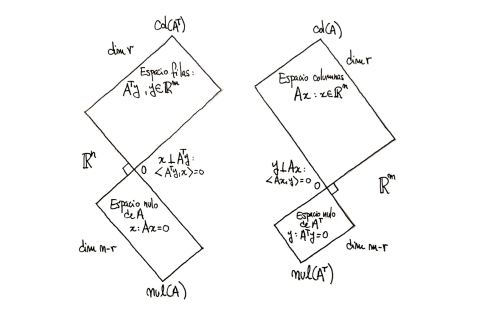

Recuerdo:

$Bx=v$ tiene solución si y solamente si $v ∈ col(B)$

*   $Bx=v$ tiene solución única $<=>$ las columnas de A forman un conjunto LI $<=>$ $Nul(A)$ = 0 
 
*   $Bx=v$ tiene $\infty$ soluciones $<=>$ las columnas de A forman un conjunto LD $<=>$ $Nul(A)$ $\neq$ 0 

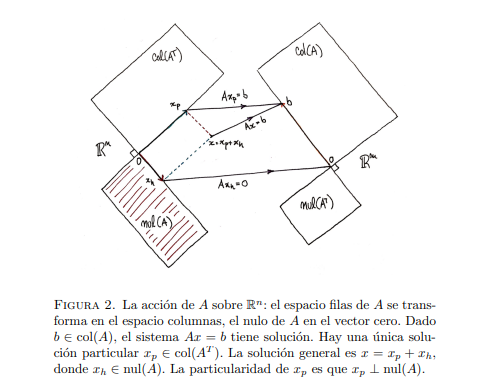

In [22]:
'''  
  A.nullspace() -> devuelve el espacio nulo de A 
  A.columnspace() -> devuelve el espacio columna de A
  A.T.columnspace() -> devuelve el espacio columna de A traspuesta
  A.T.nullspace() -> devuelve el espacio nulo de A traspuesta
  n, m = A.shape -> cantidad de filas y columnas de la matriz
'''

'''
    S: lista de los vectores que generan al subespacio S
    Los pivotes empiezan en 0 (por ej: la segunda columna figuraría con el pivote 1)
'''
def algoritmo_espacio_columna(S: List[Matrix]): #Encuentra el espacio columna de un subespacio
    B_S = Matrix.hstack(*S)
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append(S[pivote])        #De la matriz original
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio columna y los índices de los pivotes.    

def algoritmo_espacio_filas(S: List[Matrix]): #Encuentra el espacio fila de un subespacio
    B_S = Matrix.hstack(*S).T
    E_S, pivotes_S = B_S.rref()
    S_li = []
    for pivote in pivotes_S:
        S_li.append((E_S[pivote,:]).T) #De la matriz escalonada
    return S_li, pivotes_S #devuelve la matriz con los vectores que generan el espacio fila y los índices de los pivotes.     

def dos_subespacios_generan_el_mismo_subespacio(S1: List[Matrix], S2: List[Matrix]):
    
    S1_li, pivotes_S1 = algoritmo_espacio_columna(S1)
    S2_li, pivotes_S2 = algoritmo_espacio_columna(S2)
    
    B_S1_li = Matrix.hstack(*S1_li)
    B_S2_li = Matrix.hstack(*S2_li)
    
    B = Matrix.hstack(B_S1_li, B_S2_li)
    _, pivotes_B = B.rref()
    
    return len(pivotes_B) == len(pivotes_S1) and len(pivotes_B) == len(pivotes_S2)


### **Mínimos cuadrados**

In [23]:
#A.pinv() -> pseudoinversa 

def solucion_por_minimos_cuadrados(A, b):
  ATA = (A.T)*A
  ATb = (A.T)*b
  sol, sp, generadores = gauss_jordan_con_generadores(ATA, ATb)
  return sp, generadores

def error_cuadratico(b, A, x):
  return (b - A*x).norm()**2

def solucion_norma_minima(A, sp):
  filA = A.T.columnspace()
  MfilA = Matrix.hstack(*filA)
  sol, x_coord, gen = gauss_jordan_con_generadores(A*MfilA, A*sp)
  x_hat = Matrix.hstack(*filA)*x_coord #la solucion de Ax = b de norma mínima
  norma = x_hat.norm() #la norma
  return x_hat, norma

def solucion_por_minimos_cuadrados_rango_max(A, b):
  A_MP = A.pinv() #matriz pseudoinversa de Moore-Penrose
  x_hat = A_MP * b #solución por mínimos cuadrados de Ax=b
  return x_hat

### **Base Ortogonal**

In [24]:
def normalizar_base(v1,v2,producto_interno, G: Matrix = None): #pi personalizado

  v1_hat = v1 / norma(v1,producto_interno, G)
  
  aux = v2 - producto_interno(v2,v1, G) / norma(v1,producto_interno, G)**2 * v1
  v2_hat = aux / norma(aux, producto_interno, G)

  return v1_hat, v2_hat

#GramSchmidt([v1, v2, v3, v4], orthonormal=True)

def proyeccion_ortogonal_de_v_a_S_ortogonal(v: Matrix, B: List[Matrix]):
  m, n = v.shape
  P_S_v = zeros(m, n)
  for i in range(len(B)):
    u = B[i]
    P_S_v = P_S_v + proyeccion_ortogonal_de_v_a_S_un_generador(v, u, producto_interno_canonico)  
  return P_S_v

def QR(A):
  B = A.columnspace()
  Q = GramSchmidt(B, orthonormal='True') #esta es Q
  MQ = Matrix.hstack(*Q)
  MR = MQ.gauss_jordan_solve(A)[0]
  return MQ, MR

## **Específico**

### **Polinomio Característico**

El polinomio $\chi_A(x) = det(A-xI)$ se llama el polinomio característico de $A$.

Al factorizarse, el polinomio característico queda escrito como $$\chi_A = (x-\lambda_1)^{m_{\lambda _1}}\dots(x-\lambda_n)^{m_{\lambda _n}}$$ donde $m_{\lambda _n}$ se llama la multiplicidad algebraica de $\lambda$.


In [25]:
def chi(matriz): #Polinomio Caracteristico
  n, m = matriz.shape
  assert n == m, "La matriz tiene que ser cuadrada"
  I = eye(n)
  x = Symbol('x')
  chi_matriz = (matriz - x*I).det()
  return chi_matriz

### **Autovalores y Autovectores**

Sea $A \in \mathbb K^{n \times n}$. Entonces $\lambda \in \mathbb K$ es un autovalor de $A$ si existe un vector no nulo $x \in \mathbb K^n$ tal que $Ax = \lambda x$. En tal caso, el vector $x$ se llama un autovector de $A$ correspondiente al autovalor $\lambda$. El conjunto de todos los autovalores de $A$ es el espectro de $A$, y se designa como $\sigma(A)$.

$$\sigma(A)=\left\{\lambda\in\mathbb{R}: \chi_A(\lambda)=0\right\}.$$

Si $A$ es inversible, entonces: $$\sigma(A^{-1})= \{\lambda^{-1} :  \lambda \in\sigma(A)\}.$$

El subespacio $nul(A - \lambda I)$ se denomina el autoespacio de $A$ correspondiente al autovalor $\lambda$; su dimensión se denominada la multiplicidad geométrica de $\lambda$: $$\mu(\lambda) = dim(nul(A-\lambda I)).$$

Todo conjunto formado por autovectores de $A$ correspondientes a autovalores de $A$ es un conjunto linealmente independiente.

Notar que $$\sigma\left(N^k\right)=\left\{\lambda^k: \lambda\in\sigma(N)\right\}.$$

In [26]:
#matriz.eigenvals() #autovalores y multiplicidades algebraicas
#matriz.eigenvects() #autovalores, multiplicidades algebraicas, autoespacios

def base_autovects(A): #Base autovectores: P
  autovects =  A.eigenvects()
  m = len(autovects)
  X = list()
  for i in range(m):
    X.append(Matrix.hstack(*autovects[i][2]))
  P = Matrix.hstack(*X)
  return P

def autovals_and_autospaces(A):
  n, m = A.shape
  assert n == m, "A tiene que ser cuadrada"

  identity_mat = eye(n) # Matriz identidad en n x n

  l = symbols('\lambda')
  polyA = (A - l * identity_mat).det()

  avas = roots(polyA,l)
  avas = list(avas.keys())

  aves = {ava: (A-ava*identity_mat).nullspace() for ava in avas}

  return avas, aves

###**Diagonalización**


Dos matrices $A$ y $B \in \mathbb K^{n \times n}$ son semejantes si existe una matriz inversible $P \in \mathbb K^{n \times n}$ tal que $P^{-1}AP = B$. El producto $P^{-1}AP$ se denomina transformación de semejanza de $A$.

El polinomio característico es invariante por transformaciones de semejanza. Es decir, si $A$ y $B$ son semejantes, entonces sus polinomios característicos son idénticos.

Una matriz $A \in \mathbb K^{n \times n}$ es diagonalizable si $A$ es semejante a una matriz diagonal $\Lambda = diag(\lambda_1, \dots, \lambda_n)$, es decir \begin{align}
P^{-1}&AP \quad\quad  = \space\space\space\Lambda \\
PP^{-1}&APP^{-1} \space = P \Lambda P^{-1}\\
&A \quad\quad\space\space\space   = P \Lambda P^{-1}
\end{align}.

Si $A$ es diagonalizable, entonces: $$det(A) = \prod_{i=1}^{m}\lambda_i^{\mu(\lambda_i)} \quad y \quad tr(A) = \sum_{i=1}^m \mu(\lambda_i)\lambda_i.$$

Notar que $A^2 = P \Lambda P^{-1}P \Lambda P^{-1} = P\Lambda I\Lambda P^{-1} = P\Lambda^2P^{-1}$. Es decir $$A^n = P\Lambda^nP^{-1}$$

Además, como $A.v = \lambda v$, con $v$ autovector $A$, entonces $$A^nv = \lambda ^nv$$

* Sea $A \in \mathbb K^{n \times n}$. Si $|\sigma(A)| = n$, entonces $A$ es diagonalizable.
* Para que $A$ sea diagonalizable, sus multiplicidades geométrica y algebraica deben coincidir.

___
**Hallar las matrices $P$ y $\Lambda$:**

* Se halla el polinomio característico de $A$: $$\chi_A(x) = \det(A - xI).$$

* Se halla el espectro de $A$: 
$$\sigma(A)=\left\{\lambda\in\mathbb{R}: \chi_A(\lambda)=0\right\}.$$

* Se halla el subespacio asociado a cada $\lambda$: $$\mathbb S_\lambda = nul(A - \lambda I).$$
$\rightarrow$ Si sumo todas las multiplicidades geométricas, y me da menor a $n$, entonces $A$ no es diagonalizable

* Se arman las matrices: $$\Lambda = diag(\lambda_1, \dots, \lambda_n), \quad P = [\mathbb S_1 \dots \mathbb S_n]$$
$\rightarrow$ el orden en el que colocar los $\lambda$ es decreciente en valor de módulo, y en caso de tener módulos iguales, primero el positivo.

___



In [27]:
#P, Lambda = matriz.diagonalize() #P y Diagonal

### **Polinomios y Matrices**

Sean $A\in \mathbb K^{n \times n}$ y $p \in \mathbb K_m[x]$, con $p(x)=\sum_{k=0}^m b_kx^k$, entonces: $$p(A) = \sum_{k=0}^m b_kA^k,$$ donde $A^0 = I$.

Si $p$ se factoriza como $p = p_1p_2$, entonces $p(A) = p_1(A)p_2(A)$. 

Notar que $$\sigma\left(p(A)\right) = \{p(\lambda): \lambda \in \sigma(A)\}$$

Además, $p(\lambda)$ es un autovalor de $p(A)$ y que $v$ es un autovector de $p(A)$ correspondiente al autovalor $p(\lambda)$.

Por último, $nul(A-\lambda I) \subseteq nul\left(p(A)- p(\lambda)I\right)$.

Entonces vale que $$\sigma\left(N^k\right)=\left\{\lambda^k: \lambda\in\sigma(N)\right\}.$$

### **Proyectores**

Una matriz $A \in \mathbb K^{n \times n}$ con espectro $\sigma(A) = \{\lambda_1, \dots, \lambda_m\}$ es diagonalizable sii existen matrices $\{G_1, \dots, G_m\}$ tales que $A = \lambda_1 G_1 + \dots + \lambda_n G_m$ **(descomposición espectral de $A$)**.

Las $G_i$ se llaman los proyectores espectrales asociados.


**Propiedades**

* $G_i$ es la proyección sobre $nul(A - \lambda_i I)$ en la dirección de $col(A - \lambda_i I)$.

$\rightarrow$ Notar que $Nul(A-\lambda_1I) = Col(G_i)$,

$\quad\quad\quad\quad\quad Col(A-\lambda_1I) = Nul(G_i)$

* $G_iG_j = 0$ para $i \neq j$
* $G_1 + \dots + G_m = I$

Vale que $$A^n = \lambda_1^nG_1 + \dots + \lambda_m^nG_m$$

**Hacer la descomposición espectral de $A$**

\begin{align}
A &= \underbrace{\begin{bmatrix}X_1&\dots&X_m\end{bmatrix}}_P \underbrace{\begin{bmatrix}\lambda_1 I_{\mu(\lambda_1)}\\&\ddots\\&&\lambda_m I_{\mu(\lambda_m)}\end{bmatrix}}_\Lambda \underbrace{\begin{bmatrix}Y_1^T\\\vdots\\Y_m^T\end{bmatrix}}_{P^{-1}}\\
&= \begin{bmatrix}\lambda_1X_1&\dots&\lambda_mX_m\end{bmatrix} \begin{bmatrix}Y_1^T\\\vdots\\Y_m^T\end{bmatrix}\\\\
&= \lambda_1 \underbrace{X_1 Y_1^T}_{G_1} + \dots + \lambda_1 \underbrace{X_m Y_m^T}_{G_m}
\end{align}

In [28]:
def DS(matriz): #Autovalores y proyectores
  autovects =  matriz.eigenvects()
  m = len(autovects)
  X = list()
  for i in range(m):
    X.append(Matrix.hstack(*autovects[i][2]))
  P = Matrix.hstack(*X)
  IP = P.inv()
  k = 0
  mu = list()
  mu.append(0)
  for i in range(m): 
    k = k + autovects[i][1]
    mu.append(k)
  Y = list()
  for k in mu[0:m]:
    Y.append(IP[mu[k]:mu[k+1], :])
  G = list()
  for j in range(len(X)):
    G.append(simplify(autovects[j][0]))
    G.append(simplify(X[j]*Y[j]))
  return(G)

### **Limite**

La norma Frobenius $\|\cdot\|_F: \mathbb R^{n \times n} → \mathbb R^+$ es la norma inducida por el producto interno canónico en $\mathbb R^{n \times n}$. Esto es, para cada $A \in \mathbb R^{n \times n}$ vale que $$\|A\|_F = \sqrt{tr(A^TA)} = \sqrt{\sum_{i=1}^n\sum_{j=1}^n a_{ij}^2}$$

Se dice que la sucesión $(A^k)_{k \in \mathbb N}$ es convergente si existe una matriz $A^* \in \mathbb R^{n \times n}$ tal que $$\lim_{k \rightarrow \infty} \|A^k - A^*\|_F = 0.$$

Se escribe entonces que $\lim_{k→∞}A^k = A^*$, y se dice que $A^k$ converge a $A^*$.

Si $A$ es una matriz diagonalizable, el comportamiento asintótico de la sucesión $(A^k)_{k \in \mathbb N}$ está gobernado por el radio espectral de $A$ que se define mediante $$\rho(A) = max\{|\lambda|: \lambda \in \sigma(A)\}$$

* Si $\rho(A) < 1$, entonces $\lim_{k→∞}A^k = 0$.
* Si $\rho(A) > 1$, entonces $\lim_{k→∞}\|A^k\|_F = +\infty$.
* Si $\rho(A) = 1$ y $-1 \notin\sigma(A)$, entonces $\lim_{k→∞}A^k = G_1$.
* Si $\rho(A) = 1$ y $-1 \in\sigma(A)$, entonces las sucesiones $A^{2k}$ y$A^{2k-1}$ son convergentes y $\lim_{k→∞}A^{2k} \neq \lim_{k→∞}A^{2k-1}$

$ \\ $

Si $(A^k)_{k \in \mathbb N}$ es convergente, entonces $$\lim_{k→∞}A^kx = \left(\lim_{k→∞}A^k\right)x.$$

In [29]:
def limite(A):
  m = len(A.nullspace()) + len(A.columnspace())
  n = Symbol('n')
  A_n = A**n
  A_infty = zeros(m, m)
  for i in range(m):
      for j in range(m):
          A_infty[i,j] = simplify(limit_seq(A_n[i,j]))
  return(A_infty) 

#Esta función calcula el limite de la sucesión A^n 
#(casi seguro que para matrices diagonalizables)

### **Matrices Nilpotentes**

Sea $N\in\mathbb{R}^{n\times n}$. Decimos que $N$ es una matriz nilpotente de índice $k$ si
$$N^k=0\,\mbox{ pero }\, N^{k-1}\neq 0.$$
Notar que si $N$ es nilpotente de índice $k$ y $N\neq 0$, entonces $N$ no es diagonalizable.

**Teorema de Hamilton-Cayley**. Si $A\in\mathbb{R}^{n\times n}$, entonces $\chi_A(A)=0$.

**Corolario**. Si $\sigma(A)=\{\lambda\}$, $\chi_A(x)=(-1)^n(x-\lambda)^n$. 

Esto implica que 
$$(A-\lambda I)^n=0.$$
Esto significa que la matriz $N=A-\lambda I$ es nilpotente.

$ \\ $

Sea $N$ una matriz nilpotente de índice $2$. Esto significa que $N^2=0$ pero $N\neq 0$. Elegimos $v\notin{\rm nul}(N)$ y formamos la cadena de Jordan
$$\left\{Nv,v\right\}.$$
Observamos que
\begin{align*}
N\begin{bmatrix}Nv&v\end{bmatrix}=\begin{bmatrix}0&Nv\end{bmatrix}=\begin{bmatrix}Nv&v\end{bmatrix}\begin{bmatrix}0&1\\0&0\end{bmatrix}.
\end{align*}
Sea $N$ una matriz nilpotente de índice $3$. Esto significa que $N^3=0$ pero $N^2\neq 0$. Elegimos $v\notin{\rm nul}(N^2)$ y formamos la cadena de Jordan
$$\left\{N^2v,Nv,v\right\}.$$
Observamos que
\begin{align*}
N\begin{bmatrix}N^2v&Nv&v\end{bmatrix}=\begin{bmatrix}0&N^2v&Nv\end{bmatrix}=\begin{bmatrix}N^2v&Nv&v\end{bmatrix}\begin{bmatrix}0&1&0\\0&0&1\\0&0&0\end{bmatrix}.
\end{align*}

Y así con cada índice $\dots$

### **Matrices no diagonalizables**

Una matriz $A$ no es diagonalizable si:
* No tiene suficientes raíces reales.
* Algún autoespacio no tiene suficientes autovectores linealmente independientes.




#### **Morfología de las pequeeñas matrices no diagonalizables**

Toda matriz $A$ que no sea diagonalizable es semejante a una de las siguientes matrices: 



**$$\underline{\text{En } \mathbb R^{2 \times 2}}:$$**

1.  **Rotaciones seguidas de cambio de escala**

Matrices de la forma
$$\begin{bmatrix}a&b\\-b&a\end{bmatrix},$$
donde $a,b\in\mathbb{R}$ y $b\neq 0$.

La matriz no es diagonalizable porque le faltan autovalores reales.

Notar que la matriz puede escribirse como: $$\underbrace{\rho}_{\text{cambio de escala}} \underbrace{\begin{bmatrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{bmatrix}}_{\text{rotacion}},$$

donde $\rho > 0$, y $\theta \neq k \pi$ con $k \in \mathbb Z$.

También puede escribirse como:$$\underbrace{\sqrt{a^2+b^2}}_{\text{cambio de escala}} \underbrace{\begin{bmatrix}\frac{a}{\sqrt{a^2+b^2}}&\frac{b}{\sqrt{a^2+b^2}}\\-\frac{b}{\sqrt{a^2+b^2}}&\frac{a}{\sqrt{a^2+b^2}}\end{bmatrix}}_{\text{rotacion}},$$

2. **Bloques de Jordan**

Matrices de la forma: $$\begin{bmatrix}\lambda&1\\0&\lambda\end{bmatrix},$$
donde $\lambda\in\mathbb{R}.$

La matriz no es diagonalizable porque no me alcanzan los autovectores linealmente independientes para diagonalizar la matriz.



**$$\underline{\text{En } \mathbb R^{3 \times 3}}:$$**

1. **Bloques de Jordan**

Matrices de la forma: $$\begin{bmatrix}\lambda&1&0\\0&\lambda&1\\0&0&\lambda\end{bmatrix},$$
donde $\lambda\in\mathbb{R}.$

La matriz no es diagonalizable porque $\mu(\lambda) = 1$ y $m(\lambda) = 3$.

2. $ $

Matrices de la forma: $$\begin{bmatrix}\lambda&1&0\\0&\lambda&0\\0&0&\lambda\end{bmatrix},$$
donde $\lambda\in\mathbb{R}.$

La matriz no es diagonalizable porque $\mu(\lambda) = 2$ y $m(\lambda) = 3$.

3. $ $

Matrices de la forma: $$\begin{bmatrix}\lambda_1&1&0\\0&\lambda_1&0\\0&0&\lambda_2\end{bmatrix},$$
donde $\lambda_1,\lambda_2\in\mathbb{R}$ y $\lambda_1 \neq \lambda_2.$

La matriz no es diagonalizable porque $\mu(\lambda_1) = 1$ y $m(\lambda_1) = 2$.

4. $ $

Matrices de la forma: $$\begin{bmatrix}a&b&0\\-b&a&0\\0&0&\lambda\end{bmatrix},$$
donde $a,b,\lambda\in\mathbb{R}$ y $b\neq 0$.

La matriz no es diagonalizable porque le faltan autovalores reales.


$→$ **Tip: para saber cuántos $1$'s tiene el bloque de jordan, se hace $$m(\lambda) - \mu(\lambda).$$**

####**Hallar la forma canónica de Jordan**

$\bullet$ Caso $A$ con autovalores complejos.


* Hallo los autovalores y sus autovectores asociados.

$\quad$Observación: Si $z\in\mathbb{C}^n$ es un autovector asociado a $a+bi$, entonces $\overline{z}$ es un autovector asociado al autovalor $a-bi$.

* Descompongo uno de los autovectores (me conviene elegir el positivo) como: $$z=x+iy,$$ entonces$$P=\begin{bmatrix}x&y\end{bmatrix}$$

* Y $\Lambda$ se halla escribiendo a qué matriz es semejante.

$\bullet$ Caso $A \in \mathbb R^{2 \times 2}: \sigma(A) = \{\lambda\}, m(\lambda) = 2, \mu(\lambda) = 1.$

1. Armar $$N=A-\lambda I.$$
2. Buscar $v\notin{\rm nul}(N^2)$. Por ejemplo, una fila.
3. Se definen entonces
$$P=\begin{bmatrix}Nv&v\end{bmatrix}, \quad \Lambda = \begin{bmatrix}\lambda&1\\0&\lambda\end{bmatrix}.$$

$\bullet$ Caso $A \in \mathbb R^{3 \times 3}: \sigma(A) = \{\lambda\}, m(\lambda) = 3, \mu(\lambda) = 1.$

1. Armar $$N=A-\lambda I.$$
2. Buscar $v\notin{\rm nul}(N^2)$. Por ejemplo,
una fila.
4. Se definen entonces
$$P=\begin{bmatrix}N^2v&Nv&v\end{bmatrix}, \quad \Lambda = \begin{bmatrix}\lambda&1&0\\0&\lambda&1\\0&0&\lambda\end{bmatrix}.$$


$\bullet$ Caso $A \in \mathbb R^{3 \times 3}: \sigma(A) = \{\lambda\}, m(\lambda) = 3, \mu(\lambda) = 2.$

1. Armar $$N=A-\lambda I.$$
2. Buscar $v_1\notin{\rm nul}(N)$. Por ejemplo, una fila.
3. Buscar $v_2\in{\rm nul}(N)\setminus gen(Nv_1)$. Es decir, linealmente independiente con $Nv_1$.
4. Se definen entonces
$$P=\begin{bmatrix}Nv_1&v_1&v_2\end{bmatrix}, \quad \Lambda = \begin{bmatrix}\lambda&1&0\\0&\lambda&0\\0&0&\lambda\end{bmatrix}.$$

$\bullet$ Caso $A \in \mathbb R^{3 \times 3}: \sigma(A) = \{\lambda_1, \lambda_2\}, m(\lambda_1) = 2, \mu(\lambda_1) = 1$

1. Armar $$N_1=A-\lambda_1 I,\quad N_2=A-\lambda_2 I$$
2. Buscar $v_1\in{\rm nul}(N_1^2)\setminus {\rm nul}(N_1)$.
3. Buscar $v_2\in{\rm nul}(N_2)$.
4. Se definen entonces
$$P=\begin{bmatrix}N_1v_1&v_1&v_2\end{bmatrix}, \quad \Lambda = \begin{bmatrix}\lambda_1&1&0\\0&\lambda_1&0\\0&0&\lambda_2\end{bmatrix}.$$

In [30]:
#P, B = matriz.jordan_form()

###**Sistemas de Ecuaciones Diferenciales**

Si $\lambda \in \sigma(A)$ y $v \in nul(A-\lambda I)$, entonces la función $Y(t) = e^{\lambda t}v$ es solución del sistema $Y' = AY$.

$ \\ $

$\quad$ **$\bullet$ Caso $A$ diagonalizable**

Se tiene $A = P\Lambda P^{-1}$ con $P = \begin{bmatrix}v_1 &\dots&v_n\end{bmatrix}$ y $\Lambda = \begin{bmatrix}\lambda_1\\&\ddots\\&&\lambda_n\end{bmatrix}$.

La solución general del sistema $Y' = AY$ es $$Y = \sum_{j=1}^n c_j e^{\lambda_j t} v_j.$$

En particular $\{e^{\lambda_1 t} v_1, \dots, e^{\lambda_n t} v_n\}$ es un conjunto fundamental de soluciones del sistema $Y' = AY$.

$ \\ $

$\quad$ **$\bullet$ Caso $A$ con autovalores complejos**

Si $a + bi$ es un autovalor de la matriz $A\in \mathbb R^{n \times n}$ y $x + iy$ un autovector de $A$ asociado al autovalor $a+bi$, entonces $\{e^{at} \cos(bt)x - e^{at} \sin(bt)y, e^{at} \cos(bt)y + e^{at} \sin(bt)x\}$ es un conjunto de soluciones reales linealmente independiente del sistema $Y' = AY$.

$ \\ $

$\quad$ **$\bullet$ Caso $A \in \mathbb R^{2 \times 2}: \sigma(A) = \{\lambda\}, m(\lambda) = 2, \mu(\lambda) = 1.$**

Se tiene $A = P\Lambda P^{-1}$ con $P = \begin{bmatrix}v_1 &v_2\end{bmatrix}$ y $\Lambda = \begin{bmatrix}\lambda&1\\0&\lambda\end{bmatrix}$.

Sistema fundamental de soluciones de $Y' = AY$: $\{e^{\lambda t}v_1, e^{\lambda t}(tv_1 + v_2)\}$.

$ \\ $

$\quad$ **$\bullet$ Caso $A \in \mathbb R^{3 \times 3}: \sigma(A) = \{\lambda\}, m(\lambda) = 3, \mu(\lambda) = 1.$**

Se tiene $A = P\Lambda P^{-1}$ con $P = \begin{bmatrix}v_1 &v_2&v_3\end{bmatrix}$ y $\Lambda = \begin{bmatrix}\lambda&1&0\\0&\lambda&1\\0&0&\lambda\end{bmatrix}$.

Sistema fundamental de soluciones de $Y' = AY$: $\{e^{\lambda t}v_1, e^{\lambda t}(tv_1 + v_2), e^{\lambda t}(\frac{t^2}{2}v_1 + tv_2 + v_3)\}$.

$ \\ $

$\quad$ **$\bullet$ Caso $A \in \mathbb R^{3 \times 3}: \sigma(A) = \{\lambda\}, m(\lambda) = 3, \mu(\lambda) = 2.$**

Se tiene $A = P\Lambda P^{-1}$ con $P = \begin{bmatrix}v_1 &v_2&v_3\end{bmatrix}$ y $\Lambda = \begin{bmatrix}\lambda&1&0\\0&\lambda&0\\0&0&\lambda\end{bmatrix}$.

Sistema fundamental de soluciones de $Y' = AY$: $\{e^{\lambda t}v_1, e^{\lambda t}(tv_1 + v_2), e^{\lambda t}v_3\}$.

$ \\ $

$\quad$ **$\bullet$ Caso $A \in \mathbb R^{3 \times 3}: \sigma(A) = \{\lambda_1, \lambda_2\}, m(\lambda_1) = 2, \mu(\lambda_1) = 1.$**

Se tiene $A = P\Lambda P^{-1}$ con $P = \begin{bmatrix}v_1 &v_2&v_3\end{bmatrix}$ y $\Lambda = \begin{bmatrix}\lambda_1&1&0\\0&\lambda_1&0\\0&0&\lambda_2\end{bmatrix}$.

Sistema fundamental de soluciones de $Y' = AY$: $\{e^{\lambda_1 t}v_1, e^{\lambda_1 t}(tv_1 + v_2), e^{\lambda_2 t}v_3\}$.


## **Ejercicios**

### **Ejercicios Generales**

#### Sea $A \in \mathbb R^{3 \times 3}$, $A = \begin{bmatrix}1&0&0\\-6&4&-3\\k&-2&3\end{bmatrix}$. Hallar $k \in \mathbb R$ para que $A$ sea diagonalizable. Para el valor de $k$ hallado, dar una matriz inversible $P$ y una matriz diagonal $\Lambda \quad / A = P\Lambda P^{-1}$

In [31]:
k = Symbol('k')
A = Matrix([[1, 0, 0],
            [-6, 4, -3],
            [k, -2, 3]])
roots((chi(A)).factor())
#para que A sea diagonalizable, entonces el autovalor doble debe tener asociado un subespacio de dimensión doble (m = μ)
#Averiguo nul(A-1*eye(3,3)) -> lo hago a mano porque en Python no se puede
"""
A-I = Matrix([[ 0,  0,  0],
              [-6,  3, -3],
              [ k, -2,  2]])
    = Matrix([[ 0,      0,      0],
              [-2,      1,     -1],
              [ 0, -12+3k,  12-3k]]) -> si la fila no se anula, rango(A) = 2, nul(A) = 1
-> La fila se tiene que anular: k = 4
"""
A = A.subs(k, 4)
P, Lambda = A.diagonalize()

#### Sea $A \in \mathbb R^{4 \times 4} / Nul(A) = gen\left\{\begin{bmatrix}1&0&-1&0\end{bmatrix}^T,\begin{bmatrix}0&0&0&1\end{bmatrix}^T\right\}, Nul(A-3I) = gen\left\{\begin{bmatrix}0&1&-1&0\end{bmatrix}^T\right\}, Nul(A+2I) = gen\left\{\begin{bmatrix}0&0&1&2\end{bmatrix}^T\right\}$. ¿Es $A$ diagonalizable? Sin dar explícitamente la matriz $A$, calcular $A\begin{bmatrix}0&2&-2&5\end{bmatrix}^T$ y decidir si el sistema $Ax = \begin{bmatrix}1&0&0&1\end{bmatrix}^T$ tiene solución.

In [32]:
#Veo que B = {[1 0 -1 0], [0 0 0 1], [0 1 -1 0], [0 0 1 2]} es una base de R4 formada por autovectores de A
#Se que
#A[1 0 -1 0] = [0 0 0 0]
#A[0 0 0 1] = [0 0 0 0]
#A[0 1 -1 0] = 3[0 1 -1 0]
#A[0 0 1 2] = -2[0 0 1 2]
B = [Matrix([1, 0, -1, 0]), Matrix([0,0,0,1]), Matrix([0,1, -1,0]), Matrix([0,0,1,2])]
W = [Matrix([0, 0, 0, 0]), Matrix([0,0,0,0]), Matrix([0,3,-3,0]), Matrix([0,0,-2,-4])]
S = [Matrix([0,2,-2,5])]
A_T = matriz_tl_con_base_y_transformados(B, W)
imagen_por_T_de_S_con_B_y_W(B, W, S)

#Ax = b tiene sol si b pertenece a Col(A), Col(A) = {[0 1 -1 0], [0 0 1 2]} (el resto van al nulo)
#Matrix.hstack(Matrix([0, 1, -1, 0]), Matrix([0, 0, 1, 2])).gauss_jordan_solve(Matrix([1, 0, 0, 1])) #no tiene sol

⎡⎡0 ⎤⎤
⎢⎢  ⎥⎥
⎢⎢6 ⎥⎥
⎢⎢  ⎥⎥
⎢⎢-6⎥⎥
⎢⎢  ⎥⎥
⎣⎣0 ⎦⎦

#### Hallar todos los valores de $a,b,c \in \mathbb R / A = \begin{bmatrix}a&0\\b&c\end{bmatrix}$ sea diagonalizable y $\begin{bmatrix}1&1\end{bmatrix}^T \in Nul(A-2I)$. En cada caso, dar una base de $\mathbb R^2$ formada por autovectores de $A$.

In [33]:
#se que 2 es autovalor de A, y uno de los autovectores asociados es [1 1]
#Entonces A.v = 2.v
"""
          [[a, 0],[b, c]].[1,1] = 2.[1,1]
          [a, b+c] = [2,2] -> a = 2, b = 2-c
          A = [[2,  0],
               [2-c c]]
"""
#Busco valores de c para que A sea diagonalizable
c = Symbol('c')
A = Matrix([[2, 0],
            [2-c, c]])
solve(chi(A), x) #las raices son dos: 2 y c
#o(A) = {2, c} si c≠2    o   o(A) = {2 (doble)} si c=2
#A es diagonalizable si tiene 2 autovalores diferentes: c≠2

#CASO c≠2
#Primer autovector: [1,1]
#Segundo autovector:
(A-c*eye(2,2)).nullspace()
#Esos dos autovectores son una base de R2

#CASO c=2
A = A.subs(c,2) #A es diagonal
#o(A) = {2 (doble)}
(A-2*eye(2,2)).nullspace() #es todo R2
#Cualquier base de R2 sirve como base de autovectores

⎡⎡1⎤  ⎡0⎤⎤
⎢⎢ ⎥, ⎢ ⎥⎥
⎣⎣0⎦  ⎣1⎦⎦

#### Hallar, si existe, $A \in \mathbb R^{3 \times 3}$ tal que $A^2 = \begin{bmatrix}-2&-3&3\\3&4&-3\\-3&-3&4\end{bmatrix}$.

In [34]:
#p = x^2, B = p(A) = A^2
B = Matrix([[-2, -3,  3],
            [3,   4, -3],
            [-3, -3,  4]])
#Obtengo o(B)
pol = chi(B)
raices = roots(pol) #{1(doble), 4}

#Entonces o(A) ⊆ raiz(lambda de B) = {1, -1, 2, -2}

#Calculo autoespacios asociados a cada autovalor de B:
SB_1 = (B-eye(3,3)).nullspace() #autoespacio de B asociado a lambda = 1
SB_4 = (B-4*eye(3,3)).nullspace() #autoespacio de B asociado a lambda = 4
#Como las multiplicidades coinciden, B es diagonalizable -> B = P \Lambda P^-1
#P = [SB_1 SB_4], Lambda = diag(1,1,4)

#Escribo o(A) eligiendo tres de las opciones: elijo o(A) = {1, 1, 2}
#v ∈ nul(A-1.I) => v ∈ nul(B-p(1)I) => v ∈ nul(B-I)
SA_1 = SB_1 #autovectores de A asocidados a lambda = 1
#v ∈ nul(A-2.I) => v ∈ nul(B-p(2)I) => v ∈ nul(B-4I)
SA_2 = SB_4 #autovectores de A asocidados a lambda = 2
#Entonces:
P = Matrix.hstack(*SA_1, *SA_2)
Lambda = diag(1,1,2)
A = P*Lambda*P.inv()

#### Si juntamos dos poblaciones de bacterias $a$ y $b$, el comportamiento de las mismas se puede describir con las siguientes ecuaciones:

$$
\begin{cases}
a_n = \frac{6}{5}\, a_{n-1} - p\; b_{n-1} \\
b_n = \frac{3}{5}\, a_{n-1} + \frac{2}{5}\, b_{n-1}
\end{cases}
$$

**( a )** Hallar todos los valores de $p>0$ para los cuales la matriz del sistema resulta diagonalizable.

**( b )** Para cada $p \in \left\{ \frac{1}{4}, \frac{1}{5}, \frac{77}{500}\right\}$ analizar el comportamiento a largo plazo de las dos especies.

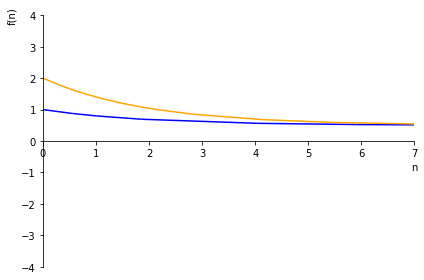

In [35]:
p, n, a0, b0 = symbols('p n a_0 b_0')
A = Matrix([['6/5', -p],
            ['3/5', '2/5']])

#(a)

raices = roots(chi(A),x)

#CASO 1: Si 4-15p es mayor a 0: hay dos raices distintas
#A es diagonalizable porque tiene dos autovalores distintos (y cada uno va a tener un autovector asociado)
#p < 4/15

#CASO 2: Si 4-15p es 0: hay una raíz doble
#p = 4/15
A2 = A.subs(p, Rational('4/15'))
raices = roots(chi(A2),x)
#Como hay un autovalor doble, tengo que checkear que el autoespacio asociado al autovalor tenga dim = 2
(A2-Rational('4/5')*eye(2,2)).nullspace() #como dim = 1, en este caso A no es diagonalizable

#Entonces A es diagonalizable si p ∈ (0, 4/15)

#(b)
A1 = A.subs(p, Rational('1/4'))
A1.eigenvects()#A1 es diagonalizable
DS(A1) #Como los autovalores son menores a 1, A1^k con k tendiendo a inf, tiende a 0
limiteA1 = limite(A1)

A2 = A.subs(p, Rational('1/5'))
A2.eigenvects()#A2 es diagonalizable
DS(A2) #A2^k con k tendiendo a inf, tiende al G correspondiente al autovalor 1: [[3/2, -1/2],[3/2, -1/2]]
limiteA2 = limite(A2)
v_init = Matrix([a0, b0])
limiteA2 * v_init #Para que haya población, 3/2 a0 - 1/2 b0 > 0
                    #                         b0 < 3a0                                              

v_n = (A2**n * v_init)
v_n = v_n.subs({
    a0: 1,
    b0: 2
})
p1 = plot(v_n[0],(n,0,100),show=False,line_color='blue',xlim=(0,7),ylim=(-4,4))
p2 = plot(v_n[1],(n,0,100),show=False,line_color='orange',xlim=(0,7),ylim=(-4,4))
p1.extend(p2)
p1.show()

A3 = A.subs(p, Rational('77/500'))
A3.eigenvects()#A3 es diagonalizable
DS(A3) #Como A2 tiene un autovalor mayor a 1, A2^k con k tendiendo a inf tiende a infinito
limiteA3 = limite(A3)


#### Hallar un conjunto fundamental de soluciones del sistema $Y' = AY$, con condición inicial $Y(0) = Y_0$, siendo $A = \begin{bmatrix}4&-3\\0&-2\end{bmatrix}$.


In [36]:
A = Matrix([[4, -3],
            [0, -2]])
A.eigenvects() #tiene dos autovalores diferentes, es diagonalizable
P, L = A.jordan_form() #entonces el conjunto fundamental de soluciones es: {e^(-2t)[1/2 1], e^(4t)[1 0]}
#y(t) = a.e^(-2t)[1/2 1] + b.e^(4t)[1 0]
#y(0) = a.[1/2 1] + b.[1 0] =  P . [a b]^T
#P^(-1) y0 = [a b]^T
n1, n2 = symbols('n_1, n_2')
y0 = Matrix([n1, n2])
a, b = P.inv()*y0
#y(t) = a.e^(-2t)[1/2 1] + b.e^(4t)[1 0]

#### Resolver los sistemas $Y' = AY$ y $Y' = BY$, con $$A = \begin{bmatrix}2&-1&1\\1&5&-2\\0&1&2\end{bmatrix}\quad y \quad B = \begin{bmatrix}1&2&-1\\0&2&0\\1&-2&3\end{bmatrix}.$$


In [37]:
A = Matrix([[2, -1,  1],
            [1,  5, -2],
            [0,  1,  2]])
A.eigenvects() #tiene un autovalor, m = 3, mu = 1, no es diagonalizable.
N = A - 3*eye(3)
N2 = N**2
v = Matrix([0, 0, 1]) #v no pertenece al Nul(N2)
P = Matrix.hstack(N2*v, N*v, v)
L = Matrix([[3, 1, 0],
            [0, 3, 1],
            [0, 0, 3]])
#Conj Fundamental de Soluciones = {e^(3t)N^2v, e^(3t)(tN^2v + Nv), e^(3t)(t^2/2 N^2v + Nvt + v)}

B = Matrix([[1,  2, -1],
            [0,  2,  0],
            [1, -2,  3]])
B.eigenvects() #tiene un autovalor, m = 3, mu = 2, no es diagonalizable.
N = B - 2*eye(3)
v1 = Matrix([-1, 2, -1]) #v no pertenece al Nul(N)
N.nullspace(), N*v1
v2 = Matrix([2, 1, 0]) #v pertenece al Nul(N), y es LI con N.v1
P = Matrix.hstack(N*v1, v1, v2)
L = Matrix([[2, 1, 0],
            [0, 2, 0],
            [0, 0, 2]])
#Conj Fundamental de Soluciones = {e^(2t)Nv1, e^(2t)(tNv1 + Nv1), e^(2t)v2}

#### Resolver el sistema $Y' = AY$, con $$A = \begin{bmatrix}4&0&0\\0&60&18\\0&-50&60\end{bmatrix}.$$


In [38]:
A = Matrix([[4,   0,  0],
            [0,  60, 18],
            [0, -50, 60]])
A.eigenvects() #tiene autovalores imaginarios, no es diagonalizable
#Autovalores: 4,         asociado al [1   0 0]
#             60 - 30 i, asociado al [0  3i 5]
#             60 + 30 i, asociado al [0 -3i 5]

#Del autovalor imaginario 60 + 30 i, descompongo el autovector: [0 -3i 5] = [0 0 5] + i.[0 -3 0] = x + iy.
#Conjunto Fundamental de soluciones: {e^(60t)cos(30t)[0 0 5] - e^(60t)sen(30t)[0 -3 0], e^(60t)sen(30t)[0 0 5] + e^(60t)cos(30t)[0 -3 0]}

#Del autovalor 4: {e^(4t)[1 0 0]}

#Junto todo: Conjunto fundamental de soluciones = {e^(4t)[1 0 0], e^(60t)cos(30t)[0 0 5] - e^(60t)sen(30t)[0 -3 0], e^(60t)sen(30t)[0 0 5] + e^(60t)cos(30t)[0 -3 0]}

⎡               ⎛              ⎡⎡ 0 ⎤⎤⎞  ⎛              ⎡⎡  0  ⎤⎤⎞⎤
⎢⎛      ⎡⎡1⎤⎤⎞  ⎜              ⎢⎢   ⎥⎥⎟  ⎜              ⎢⎢     ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢3⋅ⅈ⎥⎥⎟  ⎜              ⎢⎢-3⋅ⅈ ⎥⎥⎟⎥
⎢⎜4, 1, ⎢⎢0⎥⎥⎟, ⎜60 - 30⋅ⅈ, 1, ⎢⎢───⎥⎥⎟, ⎜60 + 30⋅ⅈ, 1, ⎢⎢─────⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜              ⎢⎢ 5 ⎥⎥⎟  ⎜              ⎢⎢  5  ⎥⎥⎟⎥
⎢⎝      ⎣⎣0⎦⎦⎠  ⎜              ⎢⎢   ⎥⎥⎟  ⎜              ⎢⎢     ⎥⎥⎟⎥
⎣               ⎝              ⎣⎣ 1 ⎦⎦⎠  ⎝              ⎣⎣  1  ⎦⎦⎠⎦

#### Resolver el sistema $Ax' = x$ con $A = \begin{bmatrix}-5&-1&1\\0&9&-7\\0&14&-12\end{bmatrix}$ y hallar los posibles valores de $x(0)$ para los cuales $\lim_{t→∞} \|x(t)\| = 0$.

In [39]:
A = Matrix([[-5, -1,   1],
            [ 0,  9,  -7],
            [ 0, 14, -12]])
A.eigenvects() #tiene dos autovalores,-5 y 2, m(-5) = 2, mu(-5) = 1 -> A no es diagonalizable.
N1 = A + 5*eye(3)
N2 = A - 2*eye(3)
N12 = N1**2
N12.nullspace(), N1.nullspace()
v1 = Matrix([0, 1, 2]) #v pertenece al Nul(N1^2), y no pertenece al Nul(N1)
N2.nullspace()
v2 = Matrix([0, 1, 1]) #v pertenece al Nul(N2)
P = Matrix.hstack(N1*v1, v1, v2)
L = Matrix([[-5,  1, 0],
            [ 0, -5, 0],
            [ 0,  0, 2]])
#Conj Fundamental de Soluciones = {e^(-5t)N1v1, e^(-5t)(tN1v1 + v1), e^(2t)v2}
#x = a.e^(-5t)N1v1 + b.e^(-5t)(tN1v1 + v1) + c.e^(2t)v2
#Si tienda a inf: x = c.e^(GRANDE)v2 = 0 => no queda otra a que c = 0.


### **Ejercicios Stop**

#### 4.**2.** Sea $A \in \mathbb R^{3 \times 3}$ que tiene autovalores $\lambda_1 = 0, \lambda_2 = 2, \lambda_3 = 5$, con autovectores asociados $v_1 = \begin{bmatrix}1&1&-1\end{bmatrix}^T, \begin{bmatrix}2&2&-1\end{bmatrix}^T, \begin{bmatrix}1&2&-1\end{bmatrix}^T$ respectivamente.

**(a)** Hallar una base de $nul(A)$ y una base de $col(A)$.

**(b)** Hallar una solución particular de la ecuación $Ax = v_2 + v_3$.

**(c)** Hallar todas las soluciones de la ecuación $Ax = v_2 + v_3$.


**(d)** Explicar por qué la ecuación $Ax = v_1$ no tiene solución.

In [40]:
#(a)
#Analizo:
#A.v1 = 0.v1 -> Nul(A)
#Como dim(Nul(A)) = 1, entonces como n - dim(Nul(A)) = dim(Col(A)) -> dim(Col(A)) = 2 
#A.v2 = 2.v2 -> Col(A) 
#A.v3 = 5.v3 -> Col(A)

#Entonces: Nul(A) = {v1}, Col(A) = {v2, v3}

#(b)
#Tomo Base B = {v1, v2, v3}
v1 = Matrix([1, 0, 0])
v2 = Matrix([0, 1, 0])
v3 = Matrix([0, 0, 1])

B = [v1,v2,v3]
W = [0*v1, 2*v2, 5*v3]
b = v2 + v3
sol, sp, gen = gauss_jordan_con_generadores(Matrix.hstack(*W), b)
#A(sp) = b

#(c)
#sol general = sp + gen(gen), es decir, sg = sp + gen(Nu(A))

#(d)
#Porque v1 no pertenece a Col(A)


#### 4.**4.** Sea $A\in\mathbb R^{3\times 3}$ la matriz dependiente de los parametros $a,b,c \in \mathbb R / A = \begin{bmatrix}0&1&0\\0&0&1\\c&b&a\end{bmatrix}$.

**(a)** Hallar los valores de $a,b,c \in \mathbb R$ tales que $\chi_A(x) = det(A-xI) = 9x - x^3$. ¿$A$ es diagonalizable?

**(b)** Para $c = 0$, hallar el conjunto de todas las parejas $a,b$ tales que $A$ es diagonalizable.

In [41]:
a,b,c,x = symbols('a,b,c,x')
A = Matrix([[0, 1,0],
            [0, 0,1],
            [c,b,a]])

#Busco valores de c para que A sea diagonalizable
(A-x*eye(3,3)).det() #como tiene que ser igual a 9x - x^3 => a = c = 0, b = 9
A1 = A.subs({a:0, c:0, b:9})

solve(chi(A1), x) #las raices son dos: -3, 0, 3
A1.diagonalize()

#(b): tengo q ver q pasa cuando los autovalores son dobles (q esos generen autoespacio doble)

⎛⎡1   1  1⎤  ⎡-3  0  0⎤⎞
⎜⎢        ⎥  ⎢        ⎥⎟
⎜⎢-3  0  3⎥, ⎢0   0  0⎥⎟
⎜⎢        ⎥  ⎢        ⎥⎟
⎝⎣9   0  9⎦  ⎣0   0  3⎦⎠

#### 4.**6.** Hallar, si existe, $A \in \mathbb R^{2 \times 2}$ tal que:

**(a)** $A^2 - 3A + 2I = \begin{bmatrix}3&3\\3&3\end{bmatrix}$.

**(b)** $A^2 - 3A + 2I = \begin{bmatrix}3&3\\3&3\end{bmatrix}$ y $det(A) = -1$.

**(c)** $A^2 - 3A + 2I = \begin{bmatrix}3&3\\3&3\end{bmatrix}$ y $tr(A) = 6$.

In [42]:
#p = x^2-3x+2, B = p(A) = A^2-3A+2
B = Matrix([[3,  3],
            [3,  3]])

#(a)

#Obtengo o(B)
pol = chi(B)
raices = roots(pol) #{0, 6}

#Entonces o(A) ⊆ {2, 1, 4, -1}

#Calculo autoespacios asociados a cada autovalor de B:
SB_1 = (B-0*eye(2,2)).nullspace() #autoespacio de B asociado a lambda = 0
SB_2 = (B-6*eye(2,2)).nullspace() #autoespacio de B asociado a lambda = 6
#Como las multiplicidades coinciden, B es diagonalizable -> B = P \Lambda P^-1
#P = [SB_1 SB_2], Lambda = diag(0,6)

#Escribo o(A) eligiendo tres de las opciones: elijo o(A) = {2, 4}
#v ∈ nul(A-2.I) => v ∈ nul(B-p(2)I) => v ∈ nul(B-0I)
SA_1 = SB_1 #autovectores de A asocidados a lambda = 2
#v ∈ nul(A-4.I) => v ∈ nul(B-p(4)I) => v ∈ nul(B-6I)
SA_2 = SB_2 #autovectores de A asocidados a lambda = 4
#Entonces:
P = Matrix.hstack(*SA_1, *SA_2)
Lambda = diag(2, 4)
A = P*Lambda*P.inv()
A**2 - 3*A + 2*eye(2) #checkeo

#(b)
#Elijo o(A) tal que lambda1 * lambda2 = -1 => lambda1 = 1, lambda2 = -1
#o(A) = {1, -1}
SA_1 = SB_1 #autovectores de A asocidados a lambda = 1
SA_2 = SB_2 #autovectores de A asocidados a lambda = -1
#Entonces:
P = Matrix.hstack(*SA_1, *SA_2)
Lambda = diag(1, -1)
A = P*Lambda*P.inv()
A**2 - 3*A + 2*eye(2) #checkeo

#(c)
#Elijo o(A) tal que lambda1 + lambda2 = 6 => lambda1 = 2, lambda2 = 4
#o(A) = {1, -1}
SA_1 = SB_1 #autovectores de A asocidados a lambda = 2
SA_2 = SB_2 #autovectores de A asocidados a lambda = 4
#Entonces:
P = Matrix.hstack(*SA_1, *SA_2)
Lambda = diag(2, 4)
A = P*Lambda*P.inv()
A**2 - 3*A + 2*eye(2) #checkeo

⎡3  3⎤
⎢    ⎥
⎣3  3⎦

#### 4.**7.** Si juntamos dos especies, una especie hervíbora $x$ y una especie carnívora $y$, la evolución de las mismas se puede describir con las siguientes ecuaciones:

$$
\begin{cases}
x_{n+1} = (1 + \frac{2}{10}) x_n - py_n. \\
y_{n+1} = \frac{1}{2} x_n + (1 - \frac{4}{10}) y_n.
\end{cases}
$$

**( a )** Hallar todos los valores de $p$ para los cuales la matriz del sistema resulta diagonalizable.

**( b )** Para cada $p \in \left\{ \frac{7}{40}, \frac{4}{25}, \frac{1}{10}\right\}$ analizar la evolución de las dos especies.

In [43]:
p, n, a0, b0 = symbols('p n a_0 b_0')
A = Matrix([[Rational('6/5'), -p],
            [Rational('1/2'), Rational('3/5')]])

#(a)

raices1 = roots(chi(A),x)

#CASO 1: Si 9-50p es mayor a 0: hay dos raices distintas
#A es diagonalizable porque tiene dos autovalores distintos (y cada uno va a tener un autovector asociado)
#p < 9/50

#CASO 2: Si 9/50 es 0: hay una raíz doble
#p = 9/50
A2 = A.subs(p, Rational('9/50'))
raices = roots(chi(A2),x)#lambda = 9/10
#Como hay un autovalor doble, tengo que checkear que el autoespacio asociado al autovalor tenga dim = 2
(A2-Rational('9/10')*eye(2,2)).nullspace() #como dim = 1, en este caso A no es diagonalizable

#Entonces A es diagonalizable si p ∈ (0, 9/50)
"""
#(b)
A1 = A.subs(p, Rational('7/40'))
A1.eigenvects()#A1 es diagonalizable
DS(A1) #Como los autovalores son menores a 1, A1^k con k tendiendo a inf, tiende a 0
limite(A1)


A2 = A.subs(p, Rational('4/25'))
A2.eigenvects()#A2 es diagonalizable
DS(A2) #A2^k con k tendiendo a inf, tiende al G correspondiente al autovalor 1: [[2, -4/5],[5/2, -1]]
v_init = Matrix([a0, b0])
limite(A2) * v_init #Para que haya población, 2 a0 - 4/5 b0 > 0         y     5/2 a0 - b0 > 0 
                    #                                  2 a0 > 4/5 b0               5/2 a0 > b0
                    #                                    a0 > 2/5 b0                   a0 > 2/5 b0
                    #                                                       

v_n = (A2**n * v_init)
v_n = v_n.subs({
    a0: Rational('3/5'),
    b0: 1
})
p1 = plot(v_n[0],(n,0,100),show=False,line_color='blue',xlim=(0,20),ylim=(-1.5,1.5))
p2 = plot(v_n[1],(n,0,100),show=False,line_color='orange',xlim=(0,20),ylim=(-1.5,1.5))
p1.extend(p2)
p1.show()


A3 = A.subs(p, Rational('1/10'))
A3.eigenvects()#A3 es diagonalizable
DS(A3) #Como A2 tiene un autovalor mayor a 1, A2^k con k tendiendo a inf tiende a infinito
limite(A3)
"""
A1 = A.subs(p, Rational('7/40'))
P, a = A1.diagonalize()#A1 es diagonalizable
P, DS(A1)

⎛⎡1  7 ⎤  ⎡17  ⎡-5/2  7/4⎤  19  ⎡7/2  -7/4⎤⎤⎞
⎜⎢     ⎥, ⎢──, ⎢         ⎥, ──, ⎢         ⎥⎥⎟
⎝⎣2  10⎦  ⎣20  ⎣ -5   7/2⎦  20  ⎣ 5   -5/2⎦⎦⎠

#### 4.**8.** Sea $A\in\mathbb R^{3 \times 3}$ definida por $$A = \begin{bmatrix}0.7&0.2&0.1\\0.3&0.5&0.2\\0.2&0.4&0.4\end{bmatrix}$$

**(a)** Hallar el espectro de $A$ y comprobar que $A$ es diagonalizable

**(b)** Calcular $\lim_{n\rightarrow \infty}A^n$ (en realidad piden otra cosa pero lo hago en papel)

In [44]:
A = Rational('1/10')*Matrix([[7, 2, 1],
                             [3, 5, 2],
                             [2, 4, 4]])
A.eigenvects() #3 autovalores, entonces A es diagonalizable
DS(A), limite(A) #Como un autovalor es 1, y el resto menores a 1, tiende a G1

⎛⎡   ⎡22  16      ⎤           ⎡ 25   17⋅√2     8    9⋅√2     9    4⋅√2 ⎤      
⎜⎢   ⎢──  ──  9/47⎥           ⎢ ── - ─────   - ── + ────   - ── + ──── ⎥      
⎜⎢   ⎢47  47      ⎥           ⎢ 94     94      47    94      94    47  ⎥      
⎜⎢   ⎢            ⎥           ⎢                                        ⎥      
⎜⎢   ⎢22  16      ⎥  3    √2  ⎢  11   13⋅√2   9⋅√2   31      31⋅√2   9 ⎥  √2  
⎜⎢1, ⎢──  ──  9/47⎥, ── - ──, ⎢- ── + ─────   ──── + ──    - ───── - ──⎥, ── +
⎜⎢   ⎢47  47      ⎥  10   10  ⎢  47    188     94    94       188    94⎥  10  
⎜⎢   ⎢            ⎥           ⎢                                        ⎥      
⎜⎢   ⎢22  16      ⎥           ⎢  11   15⋅√2    19⋅√2   8    4⋅√2   19  ⎥      
⎜⎢   ⎢──  ──  9/47⎥           ⎢- ── + ─────  - ───── - ──   ──── + ──  ⎥      
⎝⎣   ⎣47  47      ⎦           ⎣  47     47       47    47    47    47  ⎦      

     ⎡ 17⋅√2   25     8    9⋅√2     4⋅√2   9  ⎤⎤  ⎡22  16      ⎤⎞
     ⎢ ───── + ──   - ── - ────   - ──── - ── ⎥⎥  ⎢──  ──  9/47⎥

#### 4.**13.** Para cada una de las siguientes matrices $A\in \mathbb R^{2\times 2}$, hallar un conjunto fundamental de soluciones del sistema $Y0 = AY$, resolver el problema de valores iniciales $Y' = AY, Y(0) = Y_0$ y analizar su comportamiento asintótico:

**(a)** $ \quad A = \begin{bmatrix}-1&-2\\0&-3\end{bmatrix},\quad$ **(b)** $\quad A = \begin{bmatrix}1&-2\\0&-3\end{bmatrix}, \quad$ **(c)** $\quad A = \begin{bmatrix}1&-2\\0&3\end{bmatrix}$ 

In [ ]:
#(a)
A = Matrix([[-1, -2],
            [0, -3]])
A.eigenvects() #tiene dos autovalores diferentes, es diagonalizable
P, L = A.jordan_form() #entonces el conjunto fundamental de soluciones es: {e^(-3t)[1 1], e^(-1t)[1 0]}
#y(t) = a.e^(-3t)[1 1] + b.e^(-1t)[1 0]
#y(0) = a.[1 1] + b.[1 0] =  P . [a b]^T
#P^(-1) y0 = [a b]^T
n1, n2 = symbols('n_1, n_2')
y0 = Matrix([n1, n2])
a, b = P.inv()*y0
#y(t) = n2.e^(-3t)[1 2] + (n1 - n2).e^(-t)[1 0]
#lim y(inf) = 0 + 0 -> tiende a 0

#(b)
A = Matrix([[1, -2],
            [0, -3]])
A.eigenvects() #tiene dos autovalores diferentes, es diagonalizable
P, L = A.jordan_form() #entonces el conjunto fundamental de soluciones es: {e^(-3t)[1 2], e^(1t)[1 0]}
#y(t) = a.e^(-3t)[1 2] + b.e^(t)[1 0]
#y(0) = a.[1 2] + b.[1 0] =  P . [a b]^T
#P^(-1) y0 = [a b]^T
n1, n2 = symbols('n_1, n_2')
y0 = Matrix([n1, n2])
a, b = P.inv()*y0
#y(t) = n2.e^(-3t)[1 2] + (n1 - n2/2).e^(t)[1 0]
#lim y(inf) = 0 + (n1 - n2/2).inf -> si n1-n2/2 =/= 0 => tiende a infinito;
#                                    si n1-n2/2  =  0 => tiende a 0.

#(c)
A = Matrix([[1, -2],
            [0,  3]])
A.eigenvects() #tiene dos autovalores diferentes, es diagonalizable
P, L = A.jordan_form() #entonces el conjunto fundamental de soluciones es: {e^(t)[1 0], e^(3t)[-1 1]}
#y(t) = a.e^(t)[1 0] + b.e^(3t)[-1 1]
#y(0) = a.[1 0] + b.[-1 1] =  P . [a b]^T
#P^(-1) y0 = [a b]^T
n1, n2 = symbols('n_1, n_2')
y0 = Matrix([n1, n2])
a, b = P.inv()*y0
#y(t) = (n1+n2).e^(t)[1 0] + n2.e^(3t)[-1 1]
#lim y(inf) = (n1+n2).inf + n2.inf -> si n1 + n2 =/= 0 => tiende a infinito;
#                                     si n2 =/= 0 => tiende a infinito;
#                                     si n1 + n2 = 0 y n2 = 0 => tiende a 0.

#### 4.**16.** Sea $A \in \mathbb R^{3 \times 3}$ la matriz definida por $$A = \frac{1}{18} \begin{bmatrix}25&-14&-4\\-2&4&14\\-10&2&25\end{bmatrix}$$

**(a)** Hallar un conjunto fundamental de soluciones del sistema $Y'= AY$.

**(b)** Resolver el problema de valores iniciales $Y' = AY$, $Y(0)=Y_0$ y analizar su comportamiento asintótico.

In [114]:
A = Rational('1/18') * Matrix([[25, -14, -4],
                               [-2,   4, 14],
                               [-10,  2, 25]])
A.eigenvects() #tiene un autovalor con m = 2, mu = 1
N1 = A - eye(3)/2
N12 = N1**2
N2 = A - 2*eye(3)
N12.nullspace(), N1.nullspace()
v1 = Matrix([1, 2, 0]) #v pertenece a nul(N1^2) pero no a nul(N1) 
N2.nullspace()
v2 = Matrix([-2, 1, 2]) #v pertenece a nul(N2) 
P = Matrix.hstack(N1*v1, v1, v2)
L = Matrix([[Rational('1/2'), 1, 0],
            [0, Rational('1/2'), 0],
            [0, 0, 2]])
#entonces el conjunto fundamental de soluciones es: {e^(t/2)[-2/3 -2/3 -1/3], e^(t/2)(t.[-2/3 -2/3 -1/3] + [1 2 0]), e^(2t)[-2 1 2]}
#y(t) = a.e^(t/2)[-2/3 -2/3 -1/3] + b.e^(t/2)(t.[-2/3 -2/3 -1/3] + [1 2 0]) + c.e^(2t)[-2 1 2]
#y(0) = a.[-2/3 -2/3 -1/3] + b.[1 2 0] + c[-2 1 2] =  P . [a b c]^T
#P^(-1) y0 = [a b c]^T
n1, n2, n3 = symbols('n_1, n_2, n_3')
y0 = Matrix([n1, n2, n3])
a, b, c = P.inv()*y0
#y(t) = a.e^(t/2)[-2/3 -2/3 -1/3] + b.e^(t/2)(t.[-2/3 -2/3 -1/3] + [1 2 0]) + c.e^(2t)[-2 1 2]
#lim y(inf) = inf + inf + inf -> se acota solo si a = b = c = 0.

#### 4.**18.** Hallar todas las soluciones $Y \in C^\infty(\mathbb R, \mathbb R^3)$ del sistema $$Y' = \begin{bmatrix}1&4&3\\3&-2&7\\7&-4&5\end{bmatrix}Y$$ y determinar para qué valores iniciales $Y(0)\in \mathbb R^3$ la norma de $Y(t)$ es acotada para $t → ∞$

In [140]:
A =  Matrix([[ 1,  4,  3],
             [ 3, -2,  7],
             [ 7, -4,  5]])
A.eigenvects() #tiene autovalores imaginarios, no es diagonalizable
#Autovalores: 8,        asociado al [1   1 1]
#             -2 - 4 i, asociado al [-1  i 1]
#             -2 + 4 i, asociado al [-1 -i 1]

#Del autovalor imaginario -2 + 4 i, descompongo el autovector: [-1  i 1] = [-1 0 1] + i.[0 -1 0] = x + iy.
x, y = Matrix([-1, 0, 1]), Matrix([0, -1, 0])
P = Matrix.hstack(Matrix([1, 1, 1]), x, y)
#a = -2, b = 4
#Conjunto Fundamental de soluciones: {e^(-2t)cos(4t)[-1 0 1] - e^(-2t)sen(4t)[0 -1 0], e^(-2t)sen(4t)[-1 0 1] + e^(-2t)cos(4t)[0 -1 0]}

#Del autovalor 8: {e^(8t)[1 1 1]}

#Junto todo: Conjunto fundamental de soluciones = {e^(8t)[1 1 1], e^(-2t)cos(4t)[-1 0 1] - e^(-2t)sen(4t)[0 -1 0], e^(-2t)sen(4t)[-1 0 1] + e^(-2t)cos(4t)[0 -1 0]}
#y(t) = a.e^(8t)[1 1 1] + b.(e^(-2t)cos(4t)[-1 0 1] - e^(-2t)sen(4t)[0 -1 0]) + c.(e^(-2t)sen(4t)[-1 0 1] + e^(-2t)cos(4t)[0 -1 0])
#y(0) = a.[1 1 1] + b.[-1 0 1] + c.[0 1 0] =  P . [a b c]^T
#P^(-1) y0 = [a b c]^T
n1, n2, n3 = symbols('n_1, n_2, n_3')
y0 = Matrix([n1, n2, n3])
a, b, c = P.inv()*y0

#y(inf) = inf + 0 + 0
#Para a=0 el lim es acotado.
solve(a)